In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataPlaty.csv')
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [39]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#vymaže netechnické pozice v datasetu.
noTechnical_titles = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df_original = df.copy()
df = df[df['title'].apply(lambda i: i not in noTechnical_titles )] #vybere jen ty které nejsou v "noTechnical_titles"
df.title.value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Name: title, dtype: int64

In [41]:
df['gender'].unique()
df['gender'].replace({'Title: Senior Software Engineer': 'Unknown'}, inplace=True)
#vymazaní státem neuznávaná pohlaví

In [42]:
stem_salaries = df.fillna({'company':'Unknown', 'gender':'Unknown','Race': 'Unknown', 'Education': 'Unknown'}, inplace = True) # všechny nevyplněný sloupce vyplníme hotnotou "Unknown"
df.isnull().sum()

timestamp                      0
company                        0
level                        105
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          843
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                         0
otherdetails               21871
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                           0
Education                      0
dtype: int64

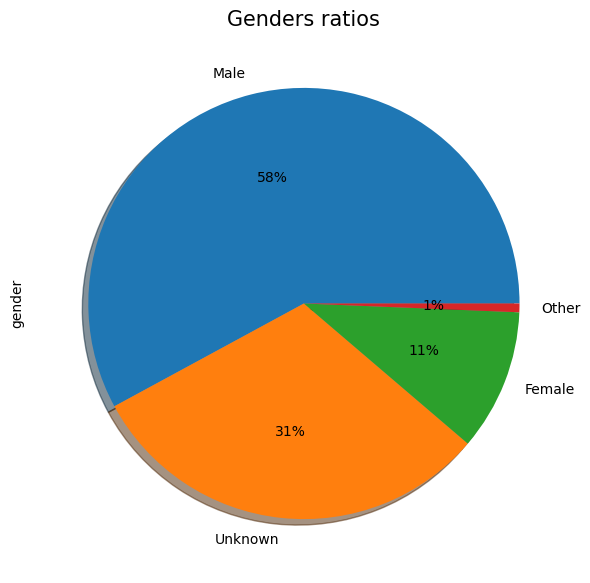

In [43]:
# zastoupení jednotlivých pohlaví
gender = df['gender'].value_counts().plot.pie(figsize = (8,7),radius=1,shadow=True, autopct='%1.f%%')
plt.title("Genders ratios", size = 15)
plt.show()


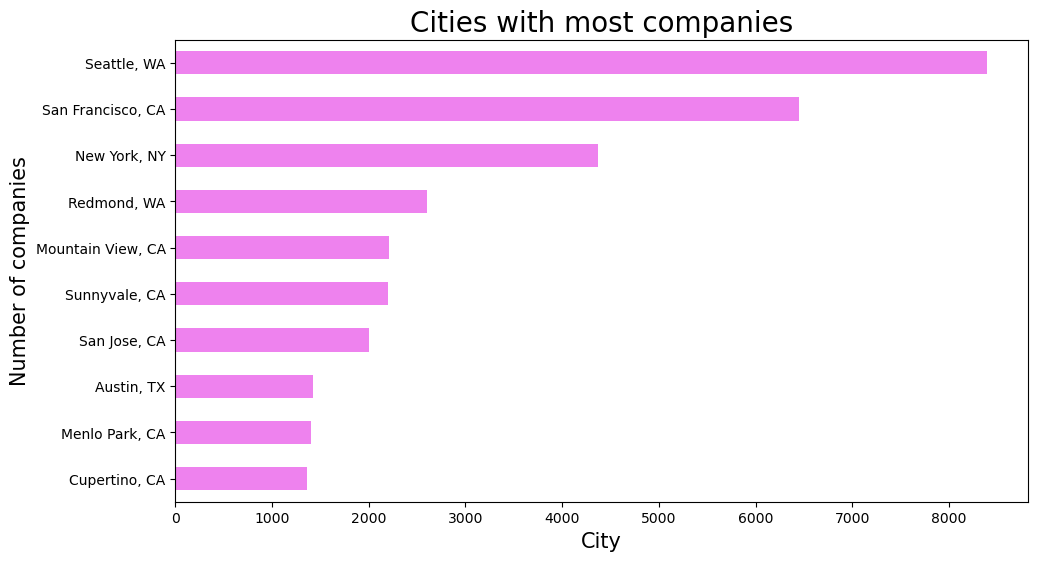

In [44]:
cities = df.location.value_counts().head(10).sort_values(ascending=True) #Města s nejvíce firmami
cities.plot.barh(figsize = (11,6),color='Violet')
plt.title("Cities with most companies" ,size=20)
plt.xlabel("City" ,size= 15)
plt.ylabel("Number of companies", size = 15)
plt.show()

In [45]:
top_saleries = df[['basesalary','title','company']].sort_values(by='basesalary',ascending=False).head(20) # 10 lidí s největším platem.
top_saleries

,basesalary,title,company
62351,1659870.0,Product Manager,Microsoft
61851,1620000.0,Software Engineer,Squarespace
45054,900000.0,Management Consultant,PwC
56175,893000.0,Software Engineer,Netflix
57701,861000.0,Software Engineer,Netflix
61967,850000.0,Software Engineering Manager,Microsoft
56529,840000.0,Software Engineer,Netflix
36746,800000.0,Software Engineer,Netflix
37462,800000.0,Software Engineering Manager,Netflix
16640,800000.0,Product Manager,Netflix


In [46]:
df['count'] = 1 #vytvořeni pomocného sloupce pro součet
most_common_companies =(
                    df.groupby(['company'])
                    .count()
                    .sort_values(by='count', ascending=False)
                    .head(20)
                    .reset_index()
                    )
most_common_companies[['company', 'count']] #Firmy s nejvyšším zastoupením zaměstnanců.




,company,count
0,Amazon,7786
1,Microsoft,5032
2,Google,4120
3,Facebook,2832
4,Apple,1932
5,Oracle,1096
6,Salesforce,1028
7,Intel,914
8,Cisco,882
9,IBM,876


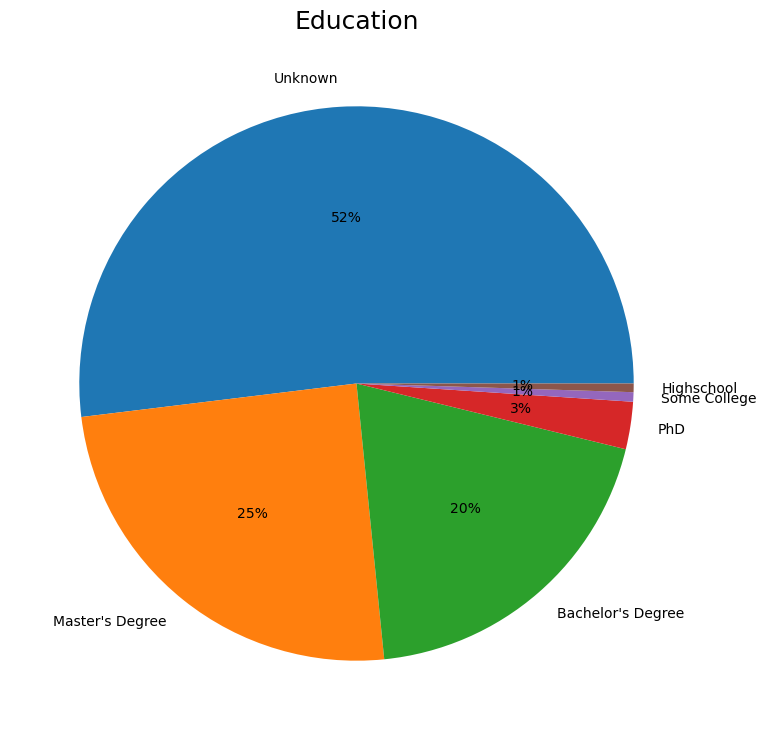

In [47]:
explode = [0, 0, 0.1, 0.2, 0.3]
education = df.Education.value_counts().plot.pie(figsize = (12,9),radius=1,shadow=False, label = '', autopct='%1.f%%')
plt.title('Education', size=18)
plt.show()

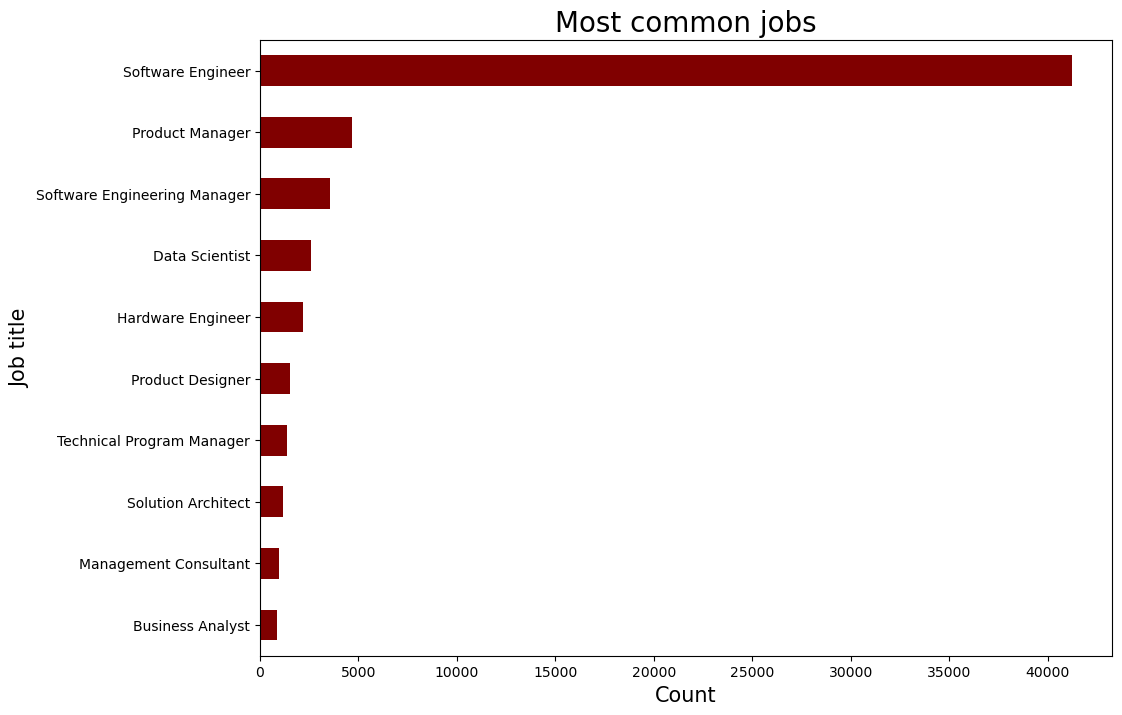

In [48]:

most_common_jobs = df.title.value_counts().sort_values(ascending = True) #nejčastější pozice
most_common_jobs.plot.barh(figsize = (11,8), color='maroon')
plt.title("Most common jobs" ,size=20)
plt.xlabel("Count" ,size= 15)
plt.ylabel("Job title", size = 15)
plt.show()

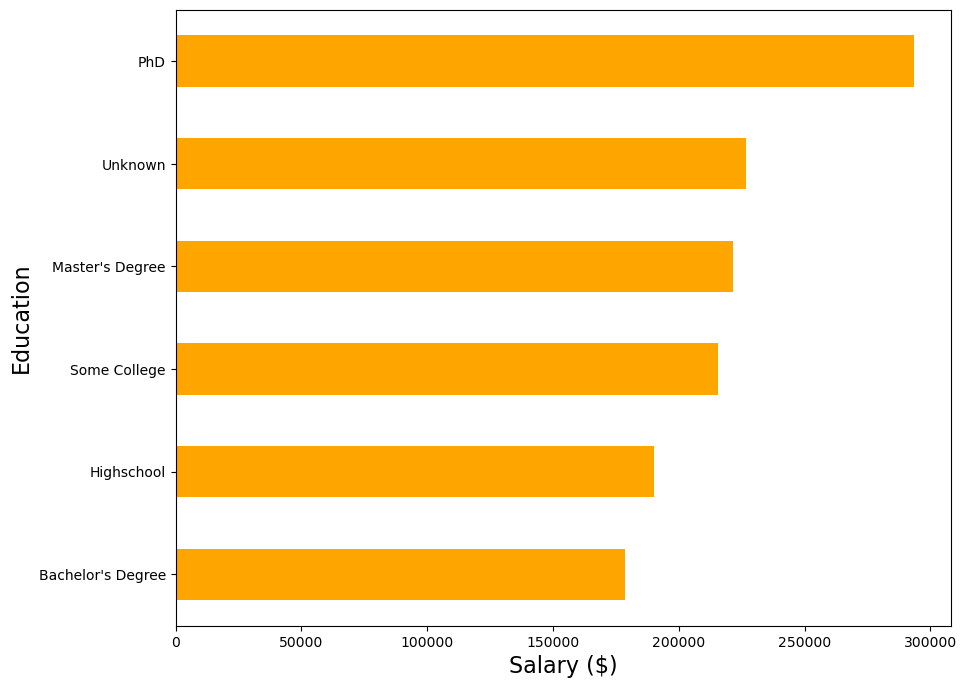

In [49]:
#plat na zákadě vzdělání

pay_education = df[['totalyearlycompensation', 'Education']].groupby(['Education']).mean().sort_values('totalyearlycompensation', ascending=True)

pay_education.plot.barh(figsize=(10, 8), legend=False, color="orange")

plt.xlabel('Salary ($)', size=16)
plt.ylabel('Education', size=16)

plt.show()



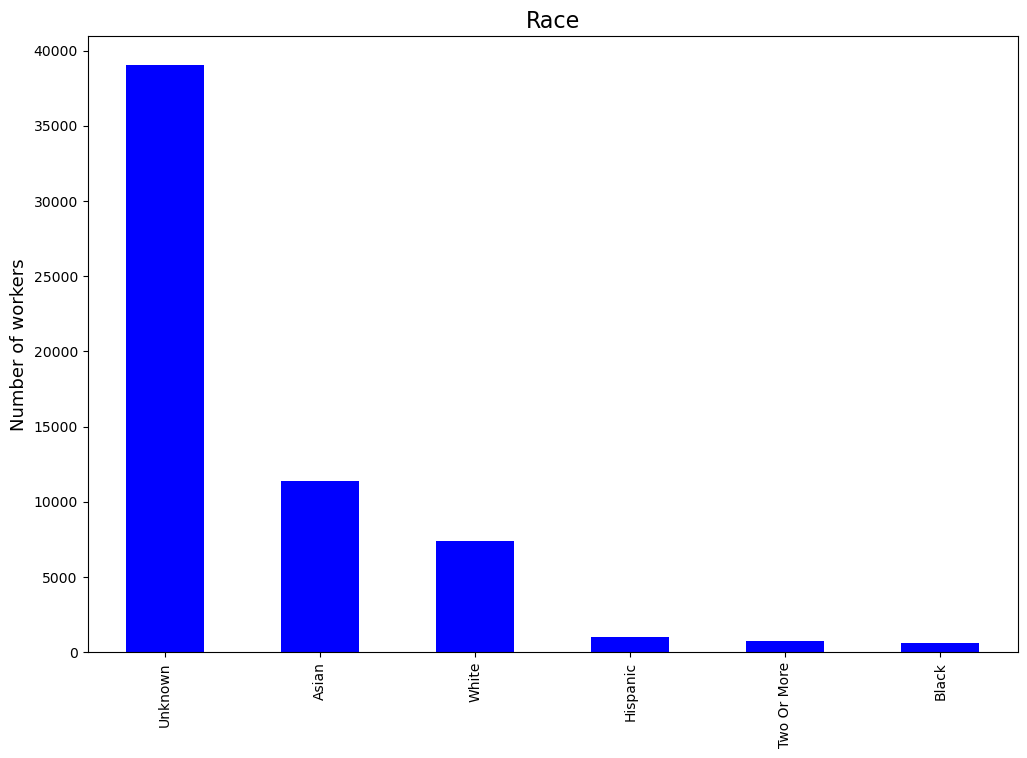

In [50]:

plt.figure(figsize=(12,8))
df['Race'].value_counts().plot(kind="bar", color = "Blue")
plt.title("Race", size = 16)
plt.ylabel("Number of workers", size = 13)
plt.show()

Text(0, 0.5, 'Company')

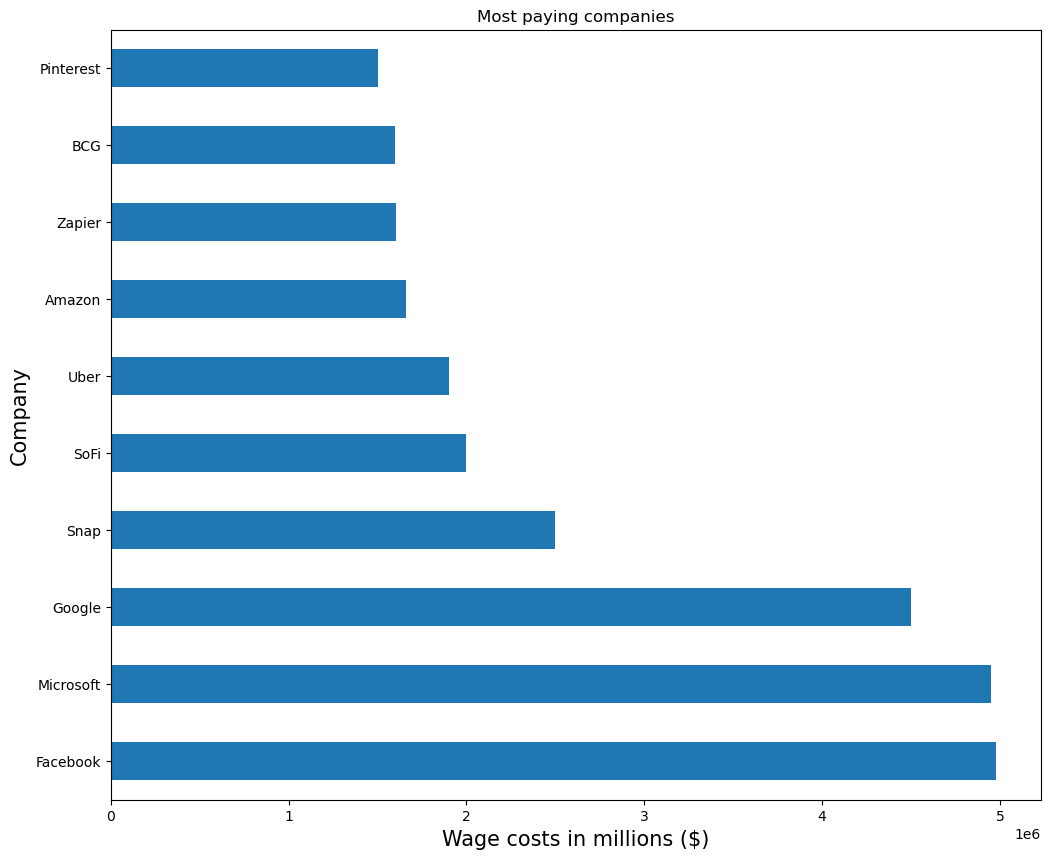

In [51]:
#Zjistěme firmy které platí svým zaměstnancům nejvíce peněz
higest_paying_companies = df[['totalyearlycompensation','company']].groupby(['company']).max().sort_values('totalyearlycompensation',ascending= False).head(10)
higest_paying_companies.plot.barh(figsize = (12,10), legend = False)
plt.title('Most paying companies')
plt.xlabel('Wage costs in millions ($)', size = 15)
plt.ylabel('Company', size = 15)

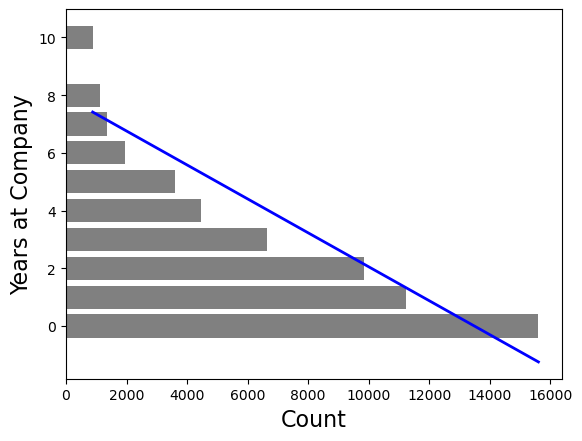

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# odstranímě řádky bez hodnot
df_filtered = df.dropna(subset=['yearsatcompany'])

# získali jsme 10 nejčastějších hodnot
years_at_company = df_filtered['yearsatcompany'].value_counts().head(10).sort_values(ascending=True)

# VYtvoření nového dataFramu s jedinečnými hodnatami  let ve firmě a počet výskytů
data = pd.DataFrame({'yearsatcompany': years_at_company.index, 'count': years_at_company.values})

# Linearni refrese
model = LinearRegression()
x = data['count'].values.reshape(-1, 1) #převedení vstupních dat na numpy pole
y = data['yearsatcompany'].values.reshape(-1, 1)
model.fit(x, y) #trenink linearní regrese na vstupních datech


x_line = np.linspace(x.min(), x.max(), 100) # 100 rovnoměrně rozdělených bodů v rozsahu od nejmenšího po největší podle "yearsatcompany"
y_line = model.predict(x_line.reshape(-1, 1)) #predikuje "yearatcompany" hodnoty ve firmě na základě "x_line", a naučené regrese.

plt.barh(data['yearsatcompany'], data['count'], color="gray")

plt.plot(x_line, y_line, color='blue', linewidth=2)

plt.xlabel('Count', size=16)
plt.ylabel('Years at Company', size=16)

plt.show()
